<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Actividad8/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***José Agustín Parada Peralta***

***Departamento de Física***

***Universidad de Sonora***

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import itertools as it

# ***Método de Euler***

Se basa en utilizar pasos pequeños $h$ en:

$$ y_{n+1}=y_n+h\ f(t_n,y_n) $$
Donde $y'=f(t_n,y_n)$


In [2]:
# Definimos la función del método de Euler para EDO explícitas.
def euler(f,y0,t):
  y=np.zeros(len(t))
  y[0]=y0

  for n in range(0,len(t)-1):
    y[n+1]=y[n]+f(y[n],t[n])*(t[n+1]-t[n])
  return y

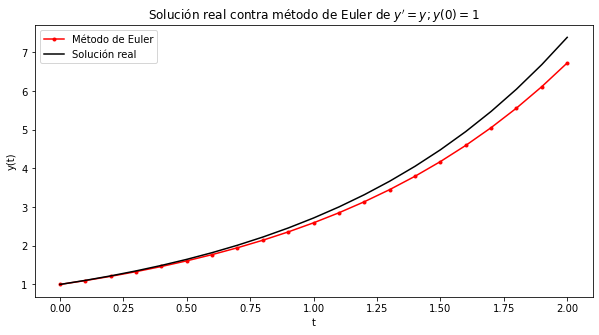

In [3]:
# Ejemplo de resolución de y'=y con y(0)=1 y su gráfica
t=np.linspace(0,2,21)
t0=0
y0=1
f=lambda y,t: y
y=euler(f,y0,t)
yr=np.exp(t)
plt.figure(figsize=(10,5))
plt.plot(t,y,'r.-',label='Método de Euler')
plt.plot(t,yr,'k',label='Solución real')
plt.title("Solución real contra método de Euler de $y' = y; y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

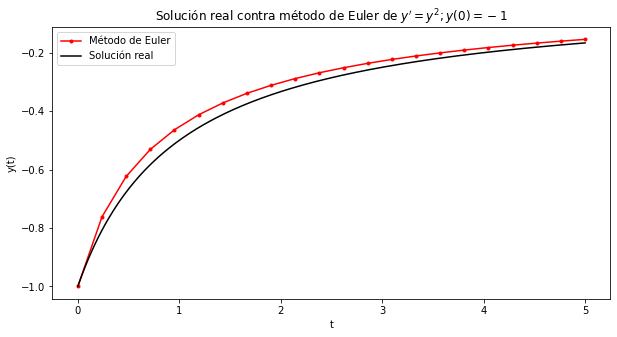

In [4]:
# Ejemplo de resolución de y'=y^2 con y(0)=-1 y su gráfica
t=np.linspace(0,5,22)
t0=0
y0=-1
f=lambda y,t: y**2
y=euler(f,y0,t)
tr=np.linspace(0,5,300)
yr=-1/(tr+1)
plt.figure(figsize=(10,5))
plt.plot(t,y,'r.-',label='Método de Euler')
plt.plot(tr,yr,'k',label='Solución real')
plt.title("Solución real contra método de Euler de $y' = y^2; y(0)=-1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# ***Ejercicio 1***

Resolver la ecuación diferencial de Van Der Pol:

$$ \frac{d^2x}{dt^2}-\mu(1-x^2)\ \frac{dx}{dt}+x=0 $$

Proponiendo una condición inicial $ x(0)=1;\; v(0)=0 $.
Resolvemos esta ED mediante la formación de un sistema de ecuaciones diferenciales de primer orden usando el cambio de variable $\dfrac{dx}{dt}=v$:

$$ \begin{align*} \frac{dx}{dt} &=v \\ \frac{dv}{dt} &= \mu(1-x^2)v-x \end{align*} $$

Vectorialmente:

$$ \frac{d\vec{y}}{dt}=\frac{d}{dt}\begin{pmatrix} x \\ v \end{pmatrix}=\begin{pmatrix} v \\ \mu(1-x^2)v-x \end{pmatrix} $$

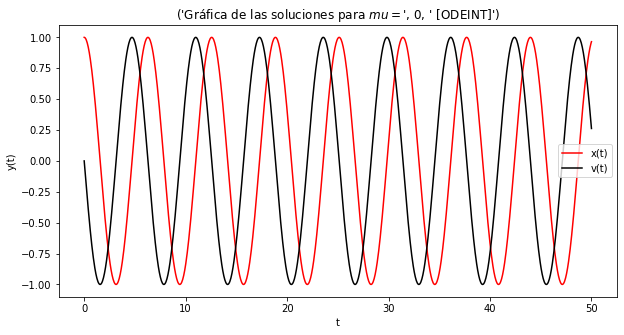

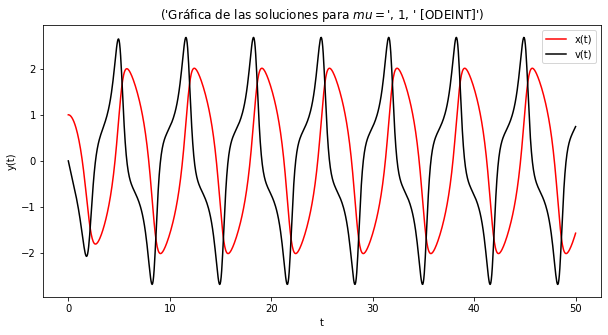

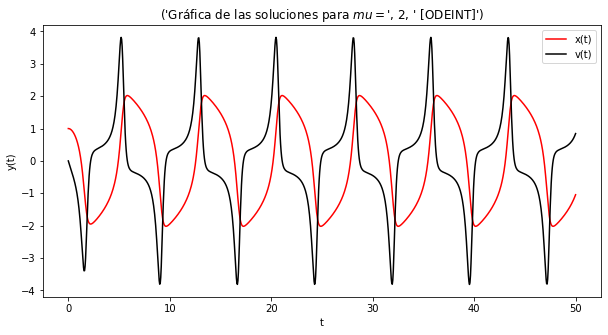

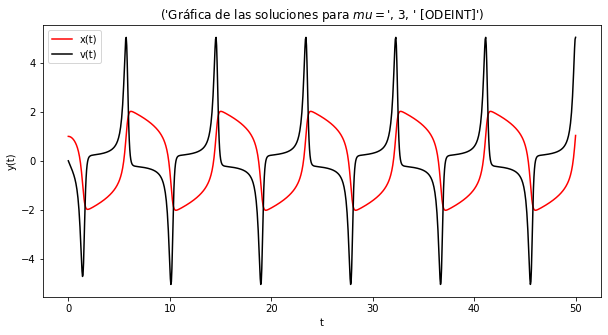

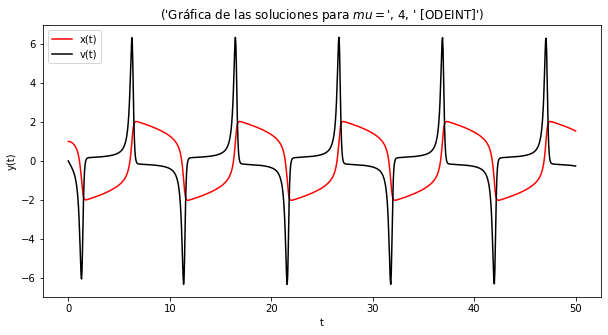

In [5]:
# Definimos la función del oscilador de Van Der Pol en su forma vectorial
def van_der_pol(y, t, mu):
  x, v = y
  dydt=[v, -x+mu*(1-x**2)*v]
  return dydt

# Creamos los puntos 't' para la evaluación de la solución y las condiciones iniciales en t_0=0
t=np.linspace(0,50,1000)
y0=[1,0]

# Aplicamos la función de SciPy: odeint() para resolver las EDs con distintos valores de los parámetros
for mu in range(0,5):
  y=odeint(van_der_pol,y0,t,args=(mu,))
  plt.figure(figsize=(10,5))
  plt.plot(t, y[:,0], 'r', label='x(t)')
  plt.plot(t, y[:,1], 'black', label='v(t)')
  plt.title(('Gráfica de las soluciones para $mu = $',mu,' [ODEINT]'))
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.legend()
  plt.show()

# ***Ejercicio 2***

Se utiliza la resolución de la ED de Van Der Pol para graficar $v$ contra $x$ con distintos valores de $\mu$:

$$ \mu \in U;\; U=\{0.01,0.1,0.5,1.0,...,3.5,4.0\}  $$

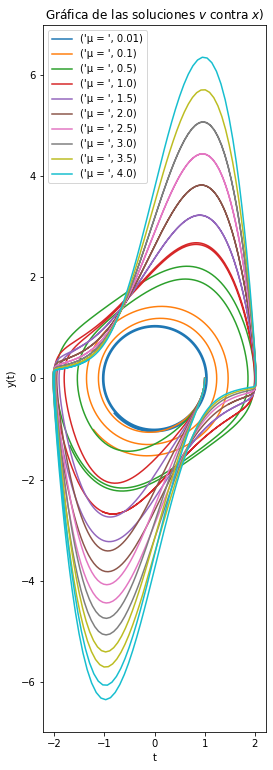

In [28]:
# Creamos los puntos t para evaluar la solución de la ED al igual que las condiciones iniciales anteriores. 
t=np.linspace(0,15,1000)
y0=[1.0,0.0]

# Definimos el conjunto de valores de mu.
mus=[0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

# Aplicamos la función odeint() para resolver la ED y graficamos las soluciones x c. v para distintos mu.
plt.figure(figsize=(4,13))
for mu in mus:
  y=odeint(van_der_pol,y0,t,args=(mu,))
  plt.plot(y[:,0], y[:,1], label=('μ = ',mu))
  plt.title(('Gráfica de las soluciones $v$ contra $x$)'))
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.legend()
plt.show()

# ***Ejercicio 3***



***Ejercicio 3.1***

Resolver la ecuación diferencial:

$$ \frac{d^2x}{dt^2} + k\left( \frac{dx}{dt} \right)^2 -g = 0;\; x(0)=0;\; \frac{dx}{dt}(0)=0;\; k>0 $$

Realizamos el cambio de variable:  $v=\dfrac{dx}{dt}$, con lo que obtenemos el sistema de ecuaciones:

$$ \frac{dx}{dt}=0\cdot x+v $$
$$ \frac{dv}{dt}=-kv^2+g=+\frac{g}{x}\cdot x -kv\cdot v $$
De forma matricial:

$$ \frac{d}{dt}\ \begin{pmatrix}
x\\
v
\end{pmatrix}=\begin{bmatrix} 0 & 1\\ \frac{g}{x} & -kv  \end{bmatrix}
\begin{pmatrix} x\\ v \end{pmatrix}=\begin{pmatrix} v \\ g-kv^2 \end{pmatrix} $$

Procedemos a resolver por los métodos de Euler y RK4 la segunda ecuación, pues es una EDO de una variable dependiente explícita. Esto último satisface las condiciones del método de Euler y Runge - Kutta. La primera variable, se aplicará una variante de la función del método de Euler definida con anterioridad para su resolución. Esto debido a que no se conoce una forma analítica de $v$ como para aplicar de nuevo el método de Euler para resolver, por separado, la primera ED del sistema. Asimismo para la resolución de Runge - Kutta. Para resolver la primera ED, se hace uso de la función *odeint()* de *SciPy*.

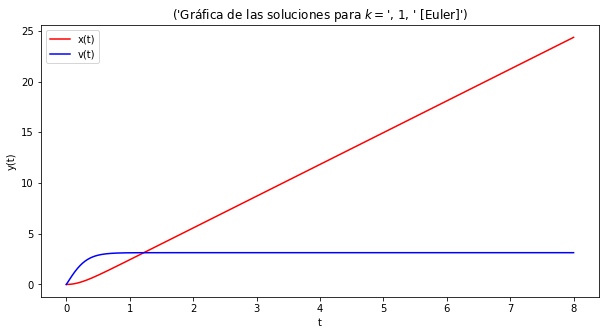

In [7]:
# Definimos un k > 0 y g la aceleración gravitatoria.
k=1
g=9.81

# Definimos la función v' = g-kv^2 y procedemos a resolverla 
t3_1=lambda v,t: g-k*v**2

# Definimos las t para evaluar las soluciones y la condición inicial
t=np.linspace(0,8,1000)
v0=0

# Resolvemos para v mediante método de Euler.
v=euler(t3_1,v0,t)
v=np.array(v)

# Resolvemos para x mediante una variante del método de Euler, pues no conocemos v de manera analítica
x=np.zeros(len(t))

for n in range(1,len(t)):
  x[n]=x[n-1]+v[n-1]*(t[1]-t[0])
  
# Graficamos las soluciones
plt.figure(figsize=(10,5))
plt.plot(t,x,'r',label='x(t)')
plt.plot(t,v,'b',label='v(t)')
plt.title(('Gráfica de las soluciones para $k = $',k,' [Euler]'))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [8]:
# Definimos la función para resolver por método de Runge - Kutta
def run_kutt(f, x_0, y_0, h):
  
    k_0 = f(y_0, x_0)
    k_1 = f(y_0 + h/2 * k_0,x_0 + h/2)
    k_2 = f(y_0 + h/2 * k_1,x_0 + h/2)
    k_3 = f(y_0 + h * k_2,x_0 + h)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

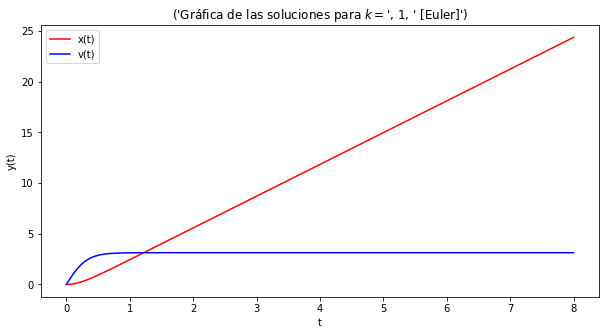

In [9]:
# Resolvemos para v por Runge - Kutta y continuamos el proceso, resolviendo para x mediante odeint()
b=8
a=0
N=800
h=(b-a)/N

# Definición de condiciones iniciales
t0=0
v0=0
x0=0
t=[t0]
v=[v0]
ti=0
vi=0

# Resolvemos para v por Runge - Kutta
for n in range(N):
  ti, vi = run_kutt(t3_1,ti,vi,h)
  t.append(ti)
  v.append(vi)

# Definimos la función en forma vectorial de la ED y resolvemos la ED
def T3_1(y,t):
  x, v = y
  dydt=[v, g-k*v**2]
  return dydt
y0=[x0,v0]
t=np.linspace(a,b,N+1)
y=odeint(T3_1,y0,t)

# Extraemos la solución faltante de v.
x=y[0:801,0]

# Grafiamos las soluciones.
plt.figure(figsize=(10,5))
plt.plot(t,x,'r',label='x(t)')
plt.plot(t,v,'b',label='v(t)')
plt.title(('Gráfica de las soluciones para $k = $',k,' [Euler]'))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

***Ejercicio 3.2***

Resolver la ED:

$$ \frac{d^2y}{dx^2}+\frac{2}{x}\ \frac{dy}{dx}+y^5=0;\; y(0)=1;\; \frac{dy}{dx}(0)=0 $$

Mediante $ u=\frac{dy}{dx} $, formamos un sistema de EDO de primer orden:

$$ \begin{align*} \frac{dy}{dx} &=u \\ \frac{du}{dx} &= -\frac{2}{x}u+y^5 \end{align*} $$

Vectorialmente:

$$ \frac{d}{dx}\begin{pmatrix} x\\u \end{pmatrix}=\begin{pmatrix} u\\ -\frac{2}{x}u+y^5 \end{pmatrix} $$

Vemos que la segunda es una EDO con varias variables dependientes, como no se conoce una expresión analítica de $u$, eso nos imposibilita la aplicación de los métodos de Euler y Runge - Kutta.

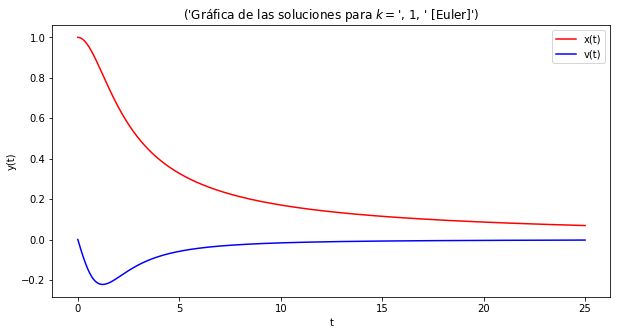

In [14]:
# Definimos la forma vectorial del sistema de EDO que surgieron
def T3_2(h,t):
  y, u = h
  dydt=[u, -(2/t)*u-y**5]
  return dydt

# Resolvemos el sistema mediante odeint()
y0=[1.0,0.0]
t=np.linspace(0.001,25.0,800)

y=odeint(T3_2,y0,t)

x=y[0:801,0]
v=y[0:801,1]

# Graficamos las soluciones
plt.figure(figsize=(10,5))
plt.plot(t,x,'r',label='x(t)')
plt.plot(t,v,'b',label='v(t)')
plt.title(('Gráfica de las soluciones para $k = $',k,' [Euler]'))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

***Ejercicio 3.3***

Resolver la ED:

$$ \frac{d^3y}{dx^3}=(x-1)^2+y^2+\frac{dy}{dx}-2;\; y(0)=1;\; y'(0)=0;\; y''(0)=2 $$

Hacemos los cambios de variable $\frac{dy}{dx}=u$; $ \frac{du}{dx}=w $

Con lo cual tenemos el sistema:

$$\begin{align*} \frac{dy}{dx} &=u\\ \frac{du}{dx} &=w\\ \frac{dw}{dx} &=(x-1)^2 +y^2+u-2  \end{align*}$$

Vectorialmente:

$$ \frac{d}{dx}\begin{pmatrix} y\\u\\w \end{pmatrix}=\begin{pmatrix} u\\w\\(x-1)^2 +y^2+u-2 \end{pmatrix} $$

Vemos que la tercera es una EDO con varias variables dependientes, como no se conoce una expresión analítica de ninguna, eso nos imposibilita la aplicación de los métodos de Euler y Runge - Kutta.

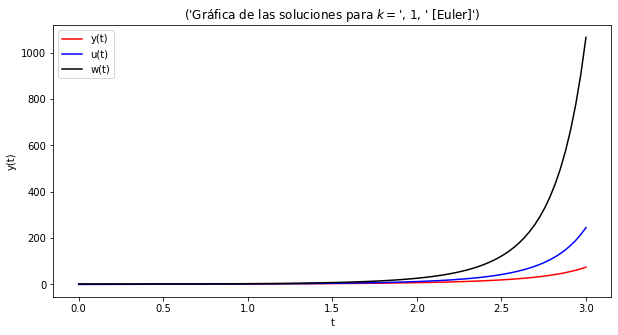

In [24]:
# Definimos la función vectorial de la ED
def T3_3(v,t):
  y, u, w = v
  dvdt=[u,w,(t-1)**2+y**2+u-2]
  return dvdt

# Definimos condiciones iniciales
y0=[1.0,0.0,2.0]
t0=0
tm=3.0
N=100
t=np.linspace(t0,tm,N)

# Resolvemos mediante odeint()
y=odeint(T3_3,y0,t)
y1=y[0:,0]
y2=y[0:,1]
y3=y[0:,2]

plt.figure(figsize=(10,5))
plt.plot(t,y1,'r',label='y(t)')
plt.plot(t,y2,'b',label='u(t)')
plt.plot(t,y3,'k',label='w(t)')
plt.title(('Gráfica de las soluciones para $k = $',k,' [Euler]'))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()